# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [270]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [272]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [279]:
df.shape

(1898, 9)

#### Observations:
#### There are 1898 rows and 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: 
order_id, customer_id, food_preparation_time, and delivery_time are all non-null integers. cost_of_the_order is a non-null float. restaurant_name, cuisine_type, day_of_the_week, and rating are all non-null objects.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [281]:
# check for missing values which come up as True if present, and sum the result to see how many missing values there are
df.isna().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
There are no missing values.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [283]:
# use .describe() method to get a general statistical overview of data. Transpose the table for easier reading.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:
The minimum, average, and maximum time it takes for food to be prepared is 20 minutes, 27.37 minutes, and 35 minutes respectively.

### **Question 5:** How many orders are not rated? [1 mark]

In [285]:
# locate the rows where rating is 'Not given' to find orders that are not rated, then use .count() to count how many orders there are.
df.loc[df["rating"]=="Not given"].count()

order_id                 736
customer_id              736
restaurant_name          736
cuisine_type             736
cost_of_the_order        736
day_of_the_week          736
rating                   736
food_preparation_time    736
delivery_time            736
dtype: int64

#### Observations:
736 orders were not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

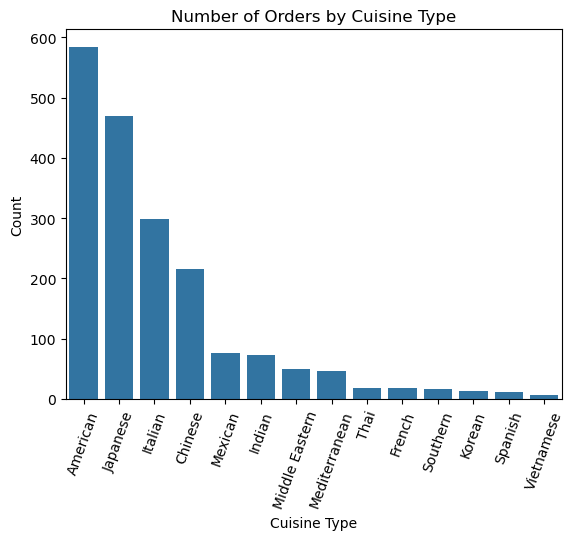

In [364]:
# Countplot for cuisine
sns.countplot(data = df, x = 'cuisine_type', order = df['cuisine_type'].value_counts().index)
plt.xticks(rotation = 70)
plt.title('Number of Orders by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Count');

Text(0.5, 0, 'Order Cost')

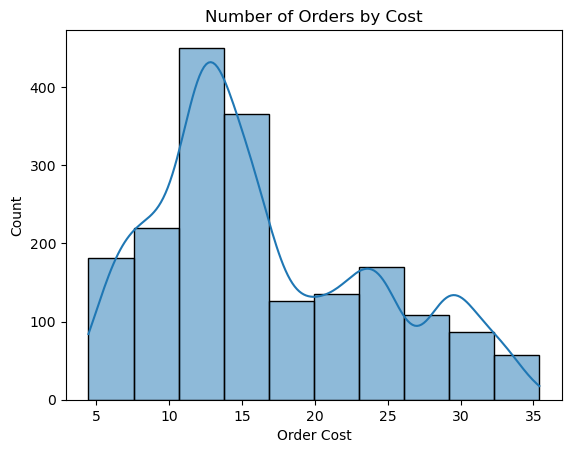

In [360]:
# Histogram for cost_of_the_order
sns.histplot(data = df, x = 'cost_of_the_order', kde = True, bins = 10);
plt.title('Number of Orders by Cost')
plt.xlabel('Order Cost')

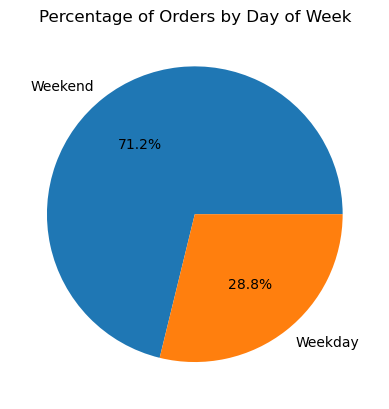

In [368]:
# Pie chart for weekday or weekend
counts = df['day_of_the_week'].value_counts()
plt.pie(counts, labels = counts.index, autopct='%1.1f%%')
plt.title('Percentage of Orders by Day of Week');

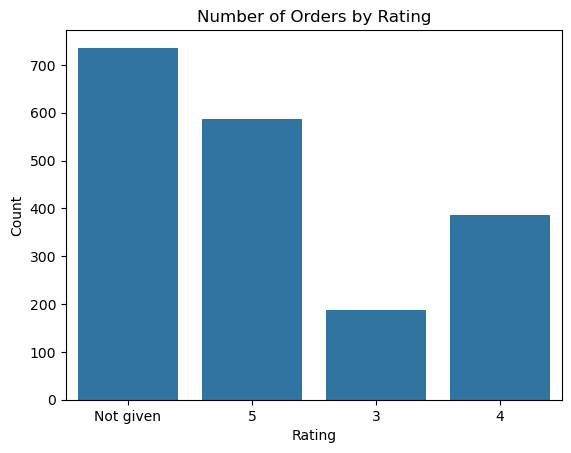

In [370]:
# Countplot for rating
sns.countplot(data=df, x='rating')
plt.title('Number of Orders by Rating')
plt.xlabel('Rating')
plt.ylabel('Count');

Text(0.5, 0, 'Food Preparation Time')

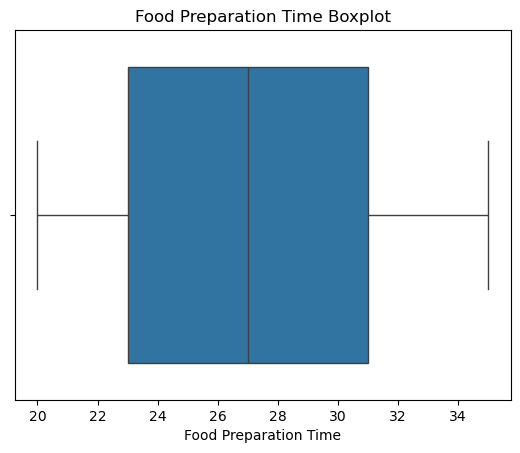

In [372]:
# Boxplot for food preparation time
sns.boxplot(data=df, x='food_preparation_time')
plt.title('Food Preparation Time Boxplot')
plt.xlabel('Food Preparation Time')

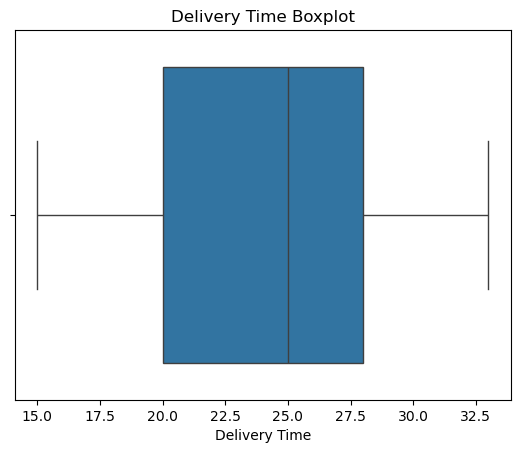

In [376]:
# Boxplot for delivery time
sns.boxplot(data=df, x='delivery_time')
plt.title('Delivery Time Boxplot')
plt.xlabel('Delivery Time');

In [ ]:
#### Observations
#### Top 3 cuisines ordered are American, Japanese, Italian (same for revenue)
#### Cost of orders are positively skewed
#### 71.2% of orders occur on weekends
#### No orders rated 1 or 2, 38% of orders not rated
#### Food preparation time is symmetric
#### Delivery time is slightly negatively skewed

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [299]:
# count the values by restaurant name
top5_order_counts = df['restaurant_name'].value_counts()

# use .nlargest() to find the top 5 restaurants with the most orders
top5_restaurants = top5_order_counts.nlargest(5)

# print the results
top5_restaurants

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

#### Observations:
#### The top 5 restaurants for orders received are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [303]:
# create a new dataframe with only weekend orders
weekend_data = df[df['day_of_the_week'] == 'Weekend']

# count the values by cuisine type
weekend_data_counts = weekend_data['cuisine_type'].value_counts()

# find the most popular cuisine
most_popular_cuisine = weekend_data_counts.nlargest(1)

# print result
most_popular_cuisine

cuisine_type
American    415
Name: count, dtype: int64

#### Observations:
#### The most popular cuisine on weekends is American with 415 orders.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [305]:
# use .sum() to find the number of orders over $20
more_than_20 = (df['cost_of_the_order'] > 20).sum()

# divide result by total number of orders, multiply by 100 to convert to percentage, and round to 1 decimal point for easy reading
round(more_than_20 * 100/len(df), 1)

29.2

#### Observations:
#### 29.2% of the orders cost more than $20.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [309]:
# use .mean() to find the mean delivery time
mean_delivery_time = df['delivery_time'].mean()

# print the result
mean_delivery_time

24.161749209694417

#### Observations:
#### The mean order delivery time is 24.2 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [311]:
# use .value_counts() to see how many orders each customer has
top3_customer_counts = df['customer_id'].value_counts()

# use .nlargest() to find the top 3 customers with most orders, and how many orders they made
top3_customers = top3_customer_counts.nlargest(3)

# print the result
top3_customers

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

#### Observations:
#### The customer IDs of the top 3 customers are 52832, 47440, and 83287. They ordered 13 times, 10 times, and 9 times respectively.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


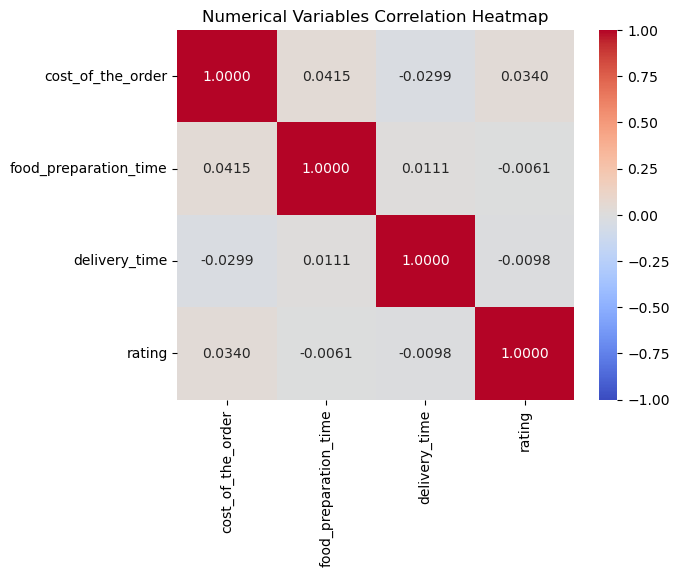

In [378]:
# Heatmap for correlation among numerical variables
df_copy = df.copy()
df_copy.loc[df_copy['rating'] == 'Not given', 'rating'] = None
num_var = ['cost_of_the_order','food_preparation_time','delivery_time', 'rating']
corr = df_copy[num_var].corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1, fmt = ".4f", xticklabels = corr.columns, yticklabels = corr.columns)
plt.title('Numerical Variables Correlation Heatmap');

In [ ]:
#### Observations:
#### There is not much significant correlation between the numerical variables. There is a slight positive correlation between food preparation time and cost of order, as well as rating and cost of order. There is a slight negative correlation between delivery time and cost of order.

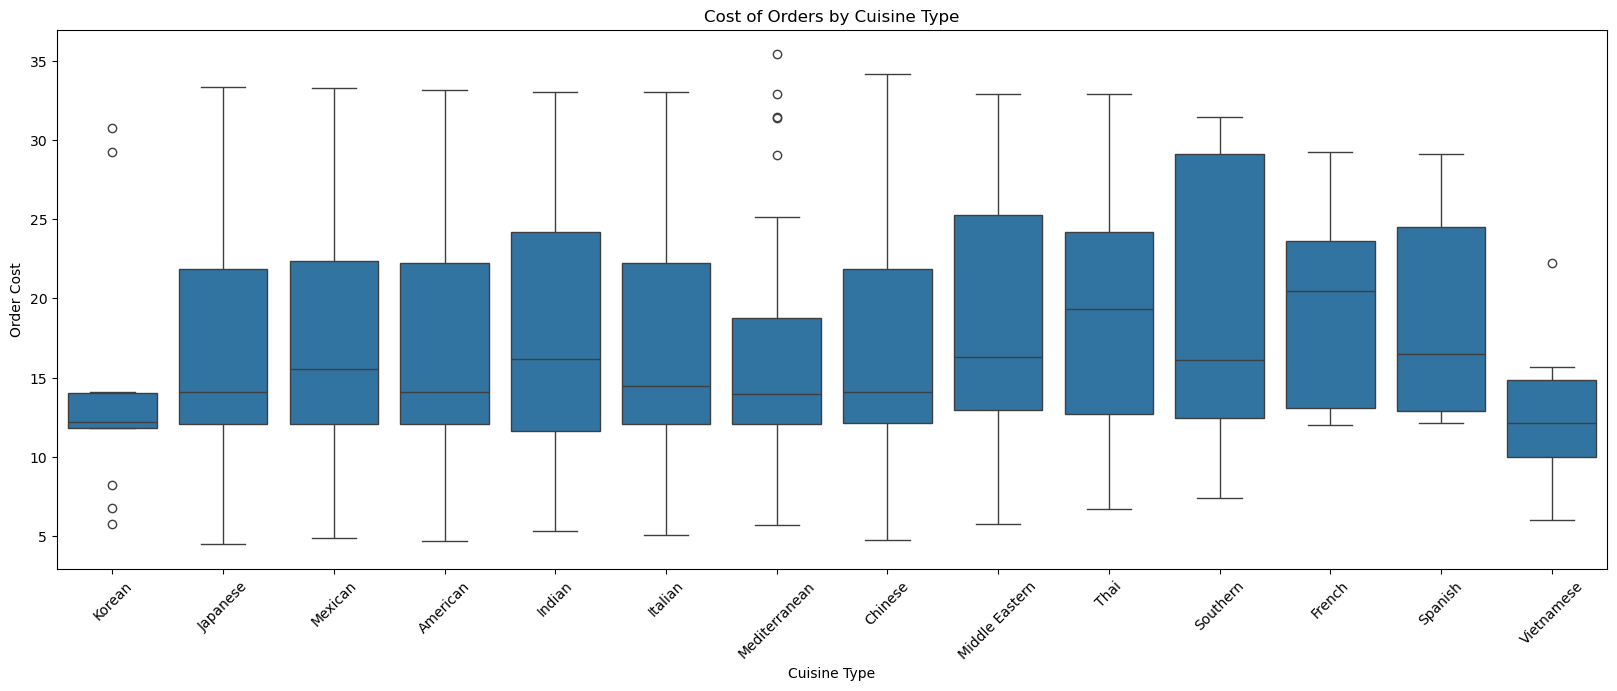

In [380]:
# Boxplots for cost of order and cuisine type, with day of the week as hue
plt.figure(figsize = (20,7))
sns.boxplot(data = df_copy, x = 'cuisine_type', y = 'cost_of_the_order')
plt.xticks(rotation = 45)
plt.title('Cost of Orders by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Order Cost');

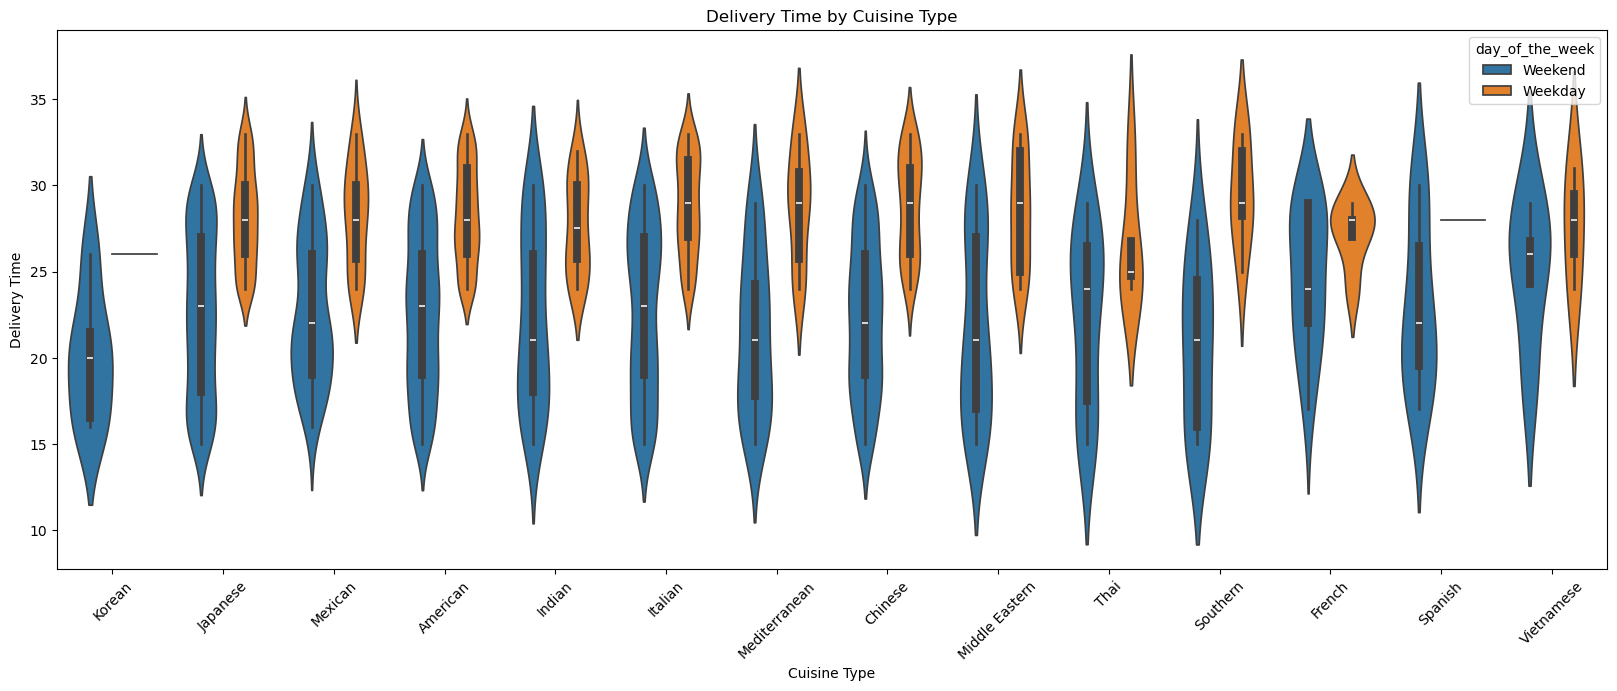

In [382]:
# Violin plots for delivery time and cuisine type, with day of the week as hue
plt.figure(figsize = (20,7))
sns.violinplot(data = df_copy, x = 'cuisine_type', y = 'delivery_time', hue = 'day_of_the_week')
plt.xticks(rotation = 45)
plt.title('Delivery Time by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Delivery Time');

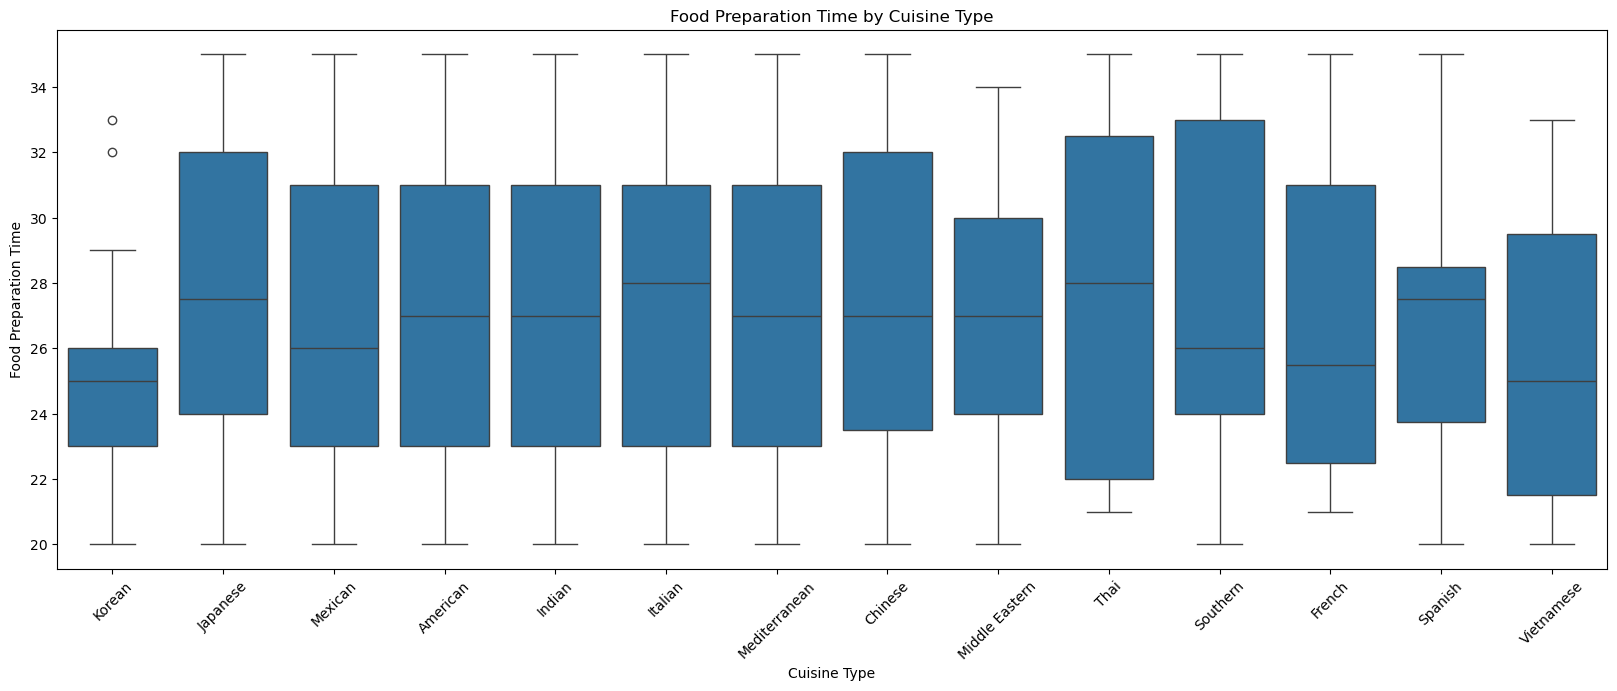

In [384]:
# Boxplot for food preparation time and cuisine type
plt.figure(figsize = (20,7))
sns.boxplot(data = df_copy, x = 'cuisine_type', y = 'food_preparation_time')
plt.xticks(rotation = 45)
plt.title('Food Preparation Time by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Food Preparation Time');

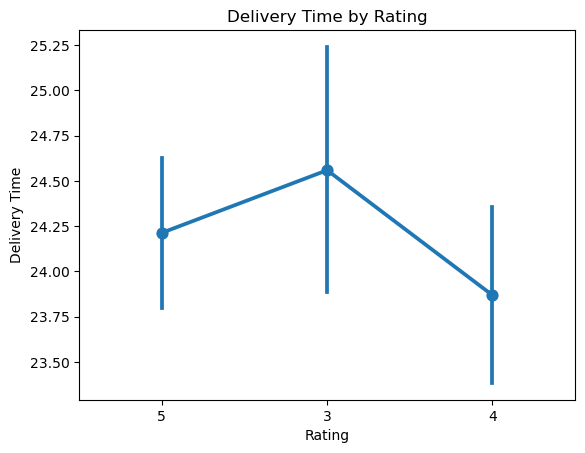

In [386]:
# Pointplot for rating and delivery time
sns.pointplot(x = 'rating', y = 'delivery_time', data = df_copy)
plt.title('Delivery Time by Rating')
plt.xlabel('Rating')
plt.ylabel('Delivery Time');

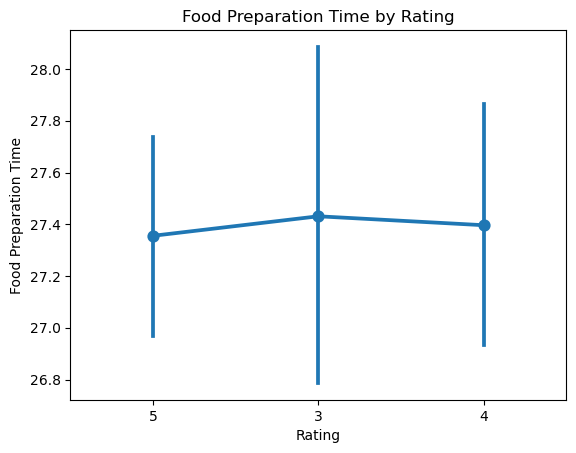

In [388]:
# Pointplot for rating and food preparation time
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df_copy)
plt.title('Food Preparation Time by Rating')
plt.xlabel('Rating')
plt.ylabel('Food Preparation Time');

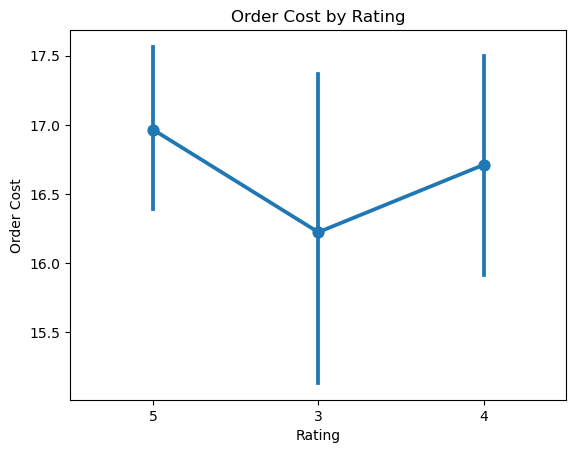

In [390]:
# Pointplot for rating and cost of order
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df_copy)
plt.title('Order Cost by Rating')
plt.xlabel('Rating')
plt.ylabel('Order Cost');

In [329]:
# Restaurants revenue and cuisine revenue
print(df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False))
print(df.groupby(['cuisine_type'])['cost_of_the_order'].sum().sort_values(ascending = False))

restaurant_name
Shake Shack                   3579.53
The Meatball Shop             2145.21
Blue Ribbon Sushi             1903.95
Blue Ribbon Fried Chicken     1662.29
Parm                          1112.76
                               ...   
Market Table                     6.79
Wa Jeal                          6.74
Cipriani Le Specialita           5.92
Big Wong Restaurant _¤¾Ñ¼       5.92
Hunan Manor                      5.72
Name: cost_of_the_order, Length: 178, dtype: float64
cuisine_type
American          9530.78
Japanese          7663.13
Italian           4892.77
Chinese           3505.62
Mexican           1303.85
Indian            1235.14
Middle Eastern     922.21
Mediterranean      711.84
Thai               364.95
French             356.29
Southern           328.11
Spanish            227.93
Korean             182.02
Vietnamese          90.18
Name: cost_of_the_order, dtype: float64


In [345]:
#### Observations
#### Delivery time is higher on weekends (employ more people as there are also more orders)
#### Shorter average prep time for Korean and Vietnamese cuisine. Korean cuisine has less variance.
#### The lower the cost of the order, the more likely it is for it to be a 3. Higher range in food preparation time and delivery time for orders rated 3.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [331]:
# create a copy of dataframe which only copies rows where column "rating" is "Not given"
rated_restaurants = df[df['rating'] != 'Not given'].copy()

# use groupby to count the number of ratings each restaurant has
rating_counts = rated_restaurants.groupby('restaurant_name')['rating'].count()

# filter restaurants for those with over 50 ratings and pull out the index
qualified_restaurants = rating_counts[rating_counts > 50].index

# from the copy of the dataframe which filtered out orders with no ratings, filter for only the restaurants with over 50 ratings. Create a copy for further filtering.
rated_restaurants_filtered = rated_restaurants.loc[rated_restaurants['restaurant_name'].isin(qualified_restaurants)].copy()

# as we need to find the average, change the ratings column data type from string to integer
rated_restaurants_filtered['rating'] = rated_restaurants_filtered['rating'].astype('int')

# use groupby to find the average rating of each restaurant
rating_averages = rated_restaurants_filtered.groupby('restaurant_name')['rating'].mean()

# filter restaurants for those with an average rating over 4 and pull out the index
qualified_rated_restaurants_filtered = rating_averages[rating_averages > 4].index

# print the restaurants with over 50 rated orders and an average rating over 4
qualified_rated_restaurants_filtered

Index(['Blue Ribbon Fried Chicken', 'Blue Ribbon Sushi', 'Shake Shack',
       'The Meatball Shop'],
      dtype='object', name='restaurant_name')

#### Observations:
#### The restaurants with a rating count of more than 50 and an average rating of greater than 4 are Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, 

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [333]:
# create function to calculate a 25% charge for orders over $20, 15% charge for orders over 5, and 0 for anything else.
def rev(x):
    if x > 20:
        return x * 0.25
    elif x > 5:
        return x * 0.15
    else:
        return 0
        
# apply function to the column "cost_of_the_order" and have the results in a new column called "Revenue" 
df['Revenue'] = df['cost_of_the_order'].apply(rev)

# sum up the column "Revenue" to find net revenue and store as total_revenue for printing later
total_revenue = df['Revenue'].sum()

# print total_revenue and round to 2 decimal points as is standard for dollar figures
round(total_revenue, 2)

6166.3

#### Observations:
#### The net revenue is $6166.30.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [335]:
# create new column "total_time" which sums the food preparation time and delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# use .sum() to find the count of rows where "total_time" is greater than 60
over_60 = (df['total_time'] > 60).sum()

# divide the number of orders where "total_time" is greater than 60 by the length of the dataframe (total number of orders). Multiply by 100 to get the percentage and round to 1 decimal point for easy reading.
round(over_60 * 100/len(df), 1)

10.5

#### Observations:
#### 10.5% of orders took more than 60  mins to get delivered from the time the order is placed.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [337]:
# find the mean weekday delivery times by filtering rows where "day_of_the_week" is "Weekday", and then using .mean(). Store result as average_weekday for printing later.
average_weekday = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()

# find the mean weekend delivery times by filtering rows where "day_of_the_week" is "Weekend", and then using .mean(). Store result as average_weekdend for printing later.
average_weekend = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()

# print the results and round them for easy reading
print(round(average_weekday, 1))
print(round(average_weekend, 1))

28.3
22.5


#### Observations:
#### The average delivery time on weekdays is 28.3 minutes, while the average delivery time on weekends is 22.5 minutes.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Top 3 cuisines ordered are American, Japanese, Italian. The same is the case for revenue.
*  71.2% of orders occur on weekends. Delivery time is also higher on weekends.
*  The orders are generally well received, with no orders rated 1 or 2.
*  While there are no significant correlation among the numerical variables, there is a slight positive correlation between food preparation time and cost of order, as well as rating and cost of order. There is a slight negative correlation between delivery time and cost of order.
*  There is a shorter average prep time for Korean and Vietnamese cuisine. Korean cuisine has less variance in prep time.
*  The lower the cost of the order, the more likely it is for it to be a 3. Higher range in food preparation time and delivery time for orders rated 3.

### Recommendations:

*  Hire more manpower/delivery drivers during the weekends due to higher volume of orders and longer current delivery times.
*  Thai and French cuisine have higher average cost per order. Given that restaurants are charged a higher percentage for costlier orders, these cuisines should be promoted.
*  Relay to restaurants that poorly rated orders were either prepared too long or too quickly. Perhaps the food delivery company needs to manage orders better to ensure restaurants are not swamped.
*  38% of orders are not rated. The company should actively encourage people to rate orders to gather more data which can improve their services. For example, they could offer a 10% discount for every 10 ratings.

---